From `analysis_notebooks/R68_eff_plot.ipynb`

In [1]:
#Import libraries & such

from IPython.core.display import display, HTML
from scipy.optimize import curve_fit
display(HTML("<style>.container { width:100% !important; }</style>"))

exec(open("../analysis_notebooks/nb_setup.py").read()) #Is there a better way to do this?

from matplotlib import *
style.use('../mplstyles/stylelib/standard.mplstyle')

from R68_efficiencies import *

../mplstyles
3.4.2
/Users/villaa/R68_paper2019/mplstyles


In [2]:
E_thresh=50 #[eV] Possible analysis threshold
E_test=np.logspace(-5,3.5,2000)

fig_w=7

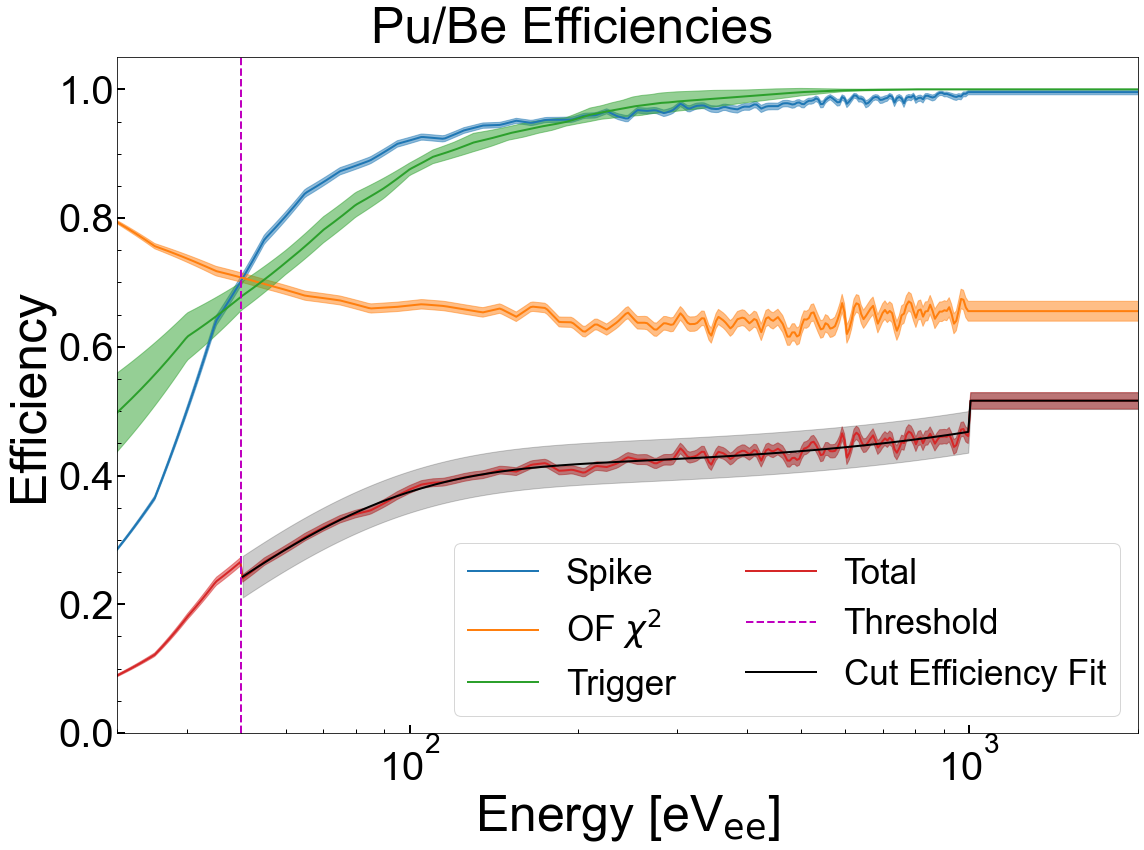

In [3]:
#Cut efficiencies
#fig,ax = plt.subplots(1,1,figsize=(16,12),sharex=True)
fig,ax = plt.subplots(1,1)

#ax.axhline(eff_tail, color = next(ax._get_lines.prop_cycler)['color'], label='Baseline')
#ax.axhspan(eff_tail-deff_tail, eff_tail+deff_tail, alpha=0.5)

#ax.axhline(eff_pileup, color = next(ax._get_lines.prop_cycler)['color'], label='Pileup')
#ax.axhspan(eff_pileup-deff_pileup, eff_pileup+deff_pileup, alpha=0.5)

line,=ax.plot(E_test, spikeEff(E_test), label='Spike')
ax.fill_between(E_test, spikeEff(E_test)-dspikeEff(E_test)[1], spikeEff(E_test)+dspikeEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,chisqEff(E_test), label='OF $\chi^2$')
ax.fill_between(E_test, chisqEff(E_test)-dchisqEff(E_test)[1], chisqEff(E_test)+dchisqEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,trigEff(E_test),label='Trigger')
ax.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=line.get_color())

line,=ax.plot(E_test, allEff(E_test), label='Total')
ax.fill_between(E_test, allEff(E_test)-dallEff(E_test)[1], allEff(E_test)+dallEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

#line,=ax.plot(E_test, trigburstEff(E_test), label='Trigger Burst')
#ax.fill_between(E_test, trigburstEff(E_test)-dtrigburstEff(E_test)[1], trigburstEff(E_test)+dtrigburstEff(E_test)[0], 
#                alpha=0.5, color=line.get_color())

ax.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')

Efitmin=50
Efitmax=1000
cfit=(E_test>=Efitmin) & (E_test<Efitmax)
#Set a single uncertainty for the fit to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( allEffFit(E_test) - (allEff(E_test)-dallEff(E_test)[1]))[cfit])
maxpos=np.max(np.abs( allEffFit(E_test) - (allEff(E_test)+dallEff(E_test)[0]))[cfit])

dEffFit=max(maxneg,maxpos)

ax.plot(E_test[E_test>Efitmin],allEffFit(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax.fill_between(E_test[E_test>Efitmin],(allEffFit(E_test)-dallEffFit(E_test))[E_test>Efitmin],(allEffFit(E_test)+dallEffFit(E_test))[E_test>Efitmin],color='k',alpha=0.2)

fig.suptitle('Pu/Be Efficiencies')
ax.set_xlim(30,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'Energy [eV$_{\mathrm{ee}}$]')
ax.set_ylabel('Efficiency')
ax.legend(ncol=2)

plt.tight_layout()

plt.savefig('figures/cut_effs.pdf')
plt.show()

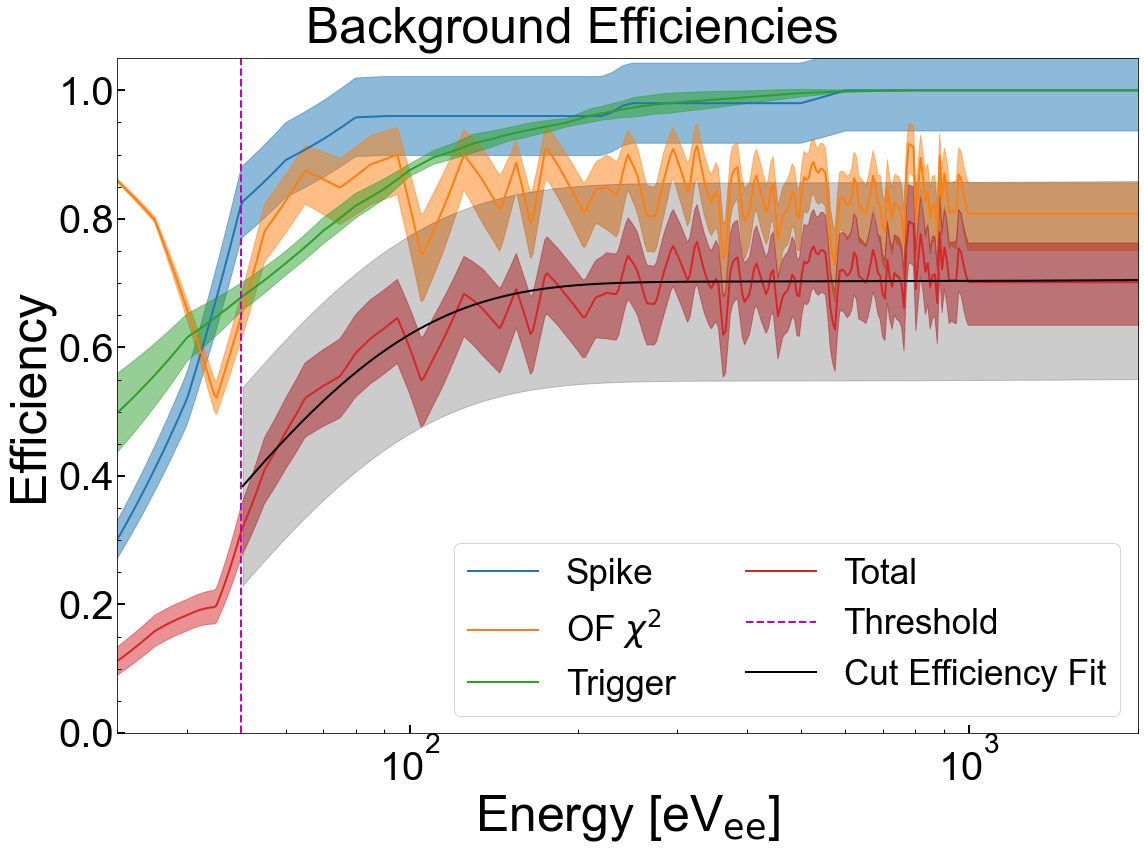

In [4]:
#Cut efficiencies for bkg data

fig,ax = plt.subplots(1,1)


#ax.axhline(eff_tail_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='Baseline')
#ax.axhspan(eff_tail_bkg-deff_tail_bkg, eff_tail_bkg+deff_tail_bkg, alpha=0.5)

#ax.axhline(eff_pileup_bkg, color = next(ax._get_lines.prop_cycler)['color'], label='Pileup')
#ax.axhspan(eff_pileup_bkg-deff_pileup_bkg, eff_pileup_bkg+deff_pileup_bkg, alpha=0.5)



line,=ax.plot(E_test, spikeEff_bkg(E_test), label='Spike')
ax.fill_between(E_test, spikeEff_bkg(E_test)-dspikeEff_bkg(E_test)[1], spikeEff_bkg(E_test)+dspikeEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,chisqEff_bkg(E_test), label='OF $\chi^2$')
ax.fill_between(E_test, chisqEff_bkg(E_test)-dchisqEff_bkg(E_test)[1], chisqEff_bkg(E_test)+dchisqEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax.plot(E_test,trigEff(E_test),label='Trigger')
ax.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=line.get_color())

line,=ax.plot(E_test, allEff_bkg(E_test), label='Total')
ax.fill_between(E_test, allEff_bkg(E_test)-dallEff_bkg(E_test)[1], allEff_bkg(E_test)+dallEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

next(ax._get_lines.prop_cycler)['color']

ax.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')


Efitmin=50
#Set a single uncertainty for the fir to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( allEffFit_bkg(E_test) - (allEffFit_bkg(E_test)-dallEff_bkg(E_test)[1]))[E_test>Efitmin])
maxpos=np.max(np.abs( allEffFit_bkg(E_test) - (allEffFit_bkg(E_test)+dallEff_bkg(E_test)[0]))[E_test>Efitmin])
dEffFit_bkg=max(maxneg,maxpos)


ax.plot(E_test[E_test>Efitmin],allEffFit_bkg(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax.fill_between(E_test[E_test>Efitmin],(allEffFit_bkg(E_test)-dallEffFit_bkg(E_test))[E_test>Efitmin],(allEffFit_bkg(E_test)+dallEffFit_bkg(E_test))[E_test>Efitmin],color='k',alpha=0.2)

fig.suptitle('Background Efficiencies')
ax.set_xlim(30,2e3)
ax.set_xscale('log')
ax.set_ylim(0,1.05)
ax.set_xlabel(r'Energy [eV$_{\mathrm{ee}}$]')
ax.set_ylabel('Efficiency')
ax.legend(ncol=2)

plt.tight_layout()

plt.savefig('figures/cut_effs_bkg.pdf')
plt.show()

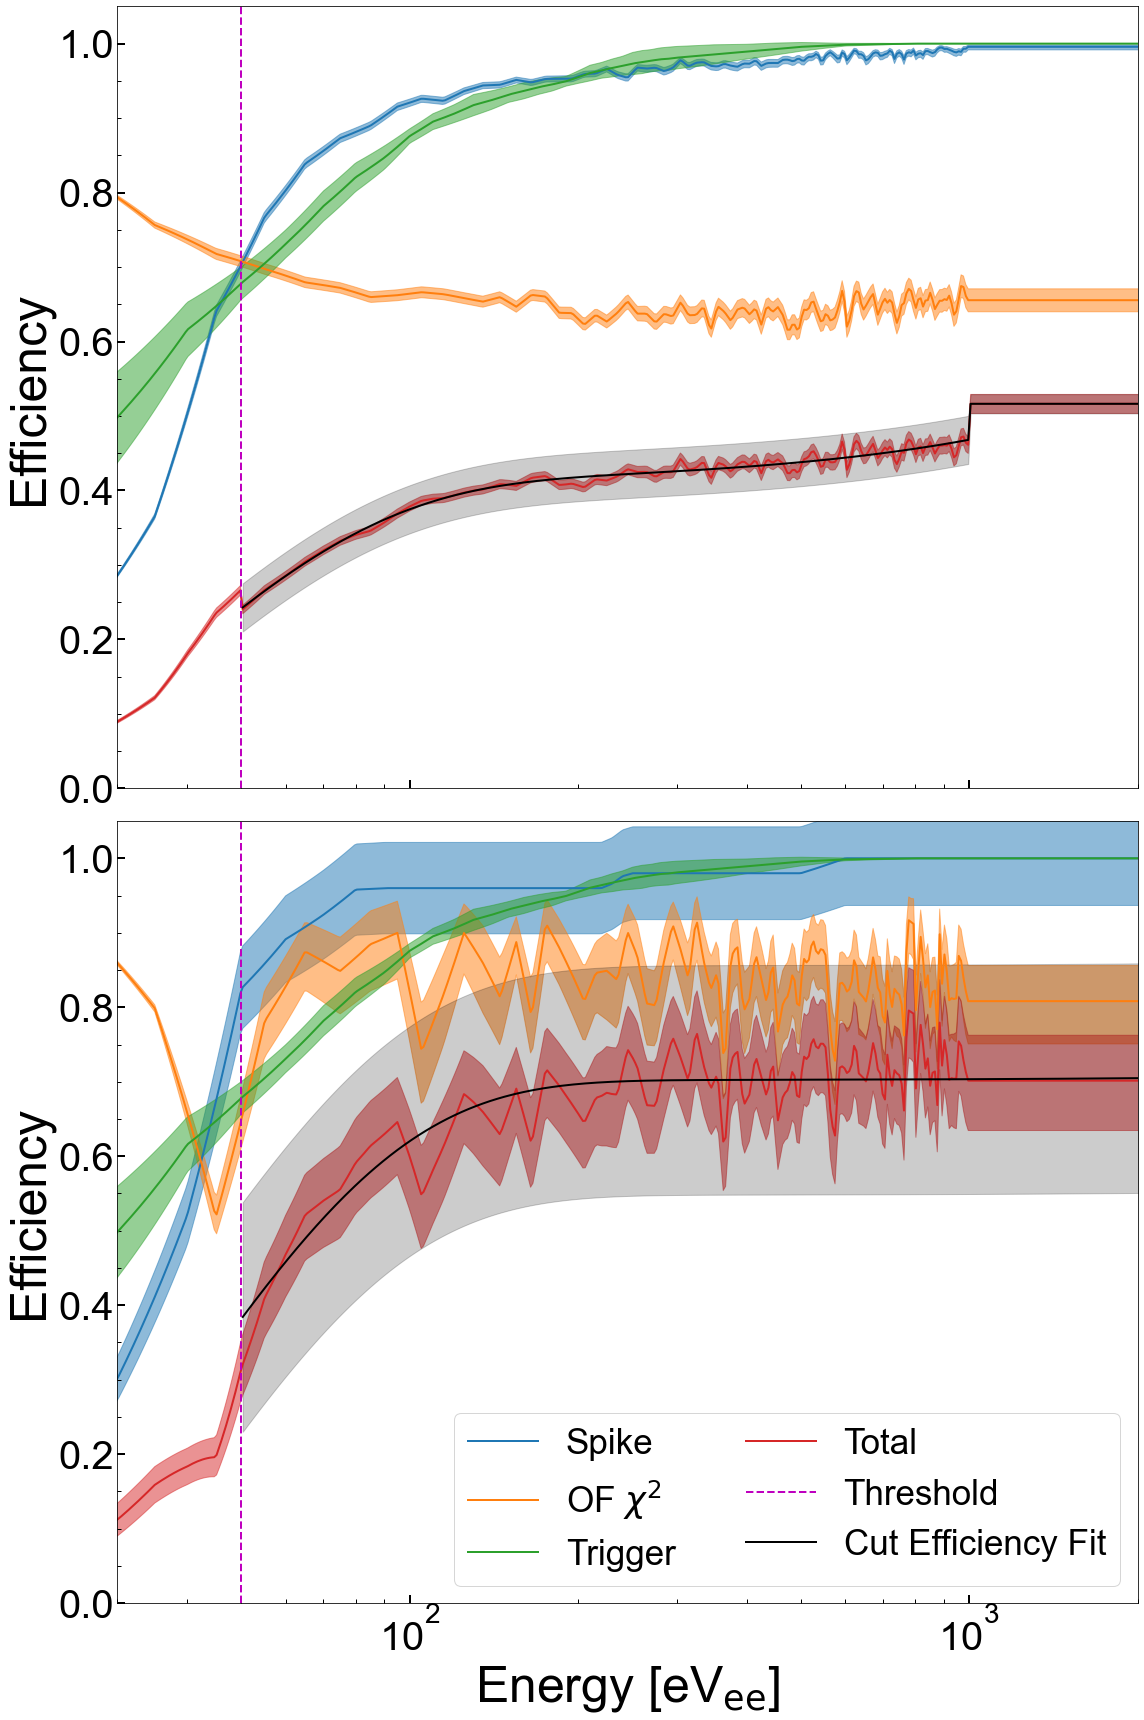

In [5]:
#try to make a stacked plot of these
fig,axes = plt.subplots(2,1,figsize=(16,24),sharex=True)

ax1=axes[0]
ax2=axes[1]

line,=ax1.plot(E_test, spikeEff(E_test), label='Spike')
ax1.fill_between(E_test, spikeEff(E_test)-dspikeEff(E_test)[1], spikeEff(E_test)+dspikeEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax1.plot(E_test,chisqEff(E_test), label='OF $\chi^2$')
ax1.fill_between(E_test, chisqEff(E_test)-dchisqEff(E_test)[1], chisqEff(E_test)+dchisqEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax1.plot(E_test,trigEff(E_test),label='Trigger')
ax1.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=line.get_color())

line,=ax1.plot(E_test, allEff(E_test), label='Total')
ax1.fill_between(E_test, allEff(E_test)-dallEff(E_test)[1], allEff(E_test)+dallEff(E_test)[0], 
                alpha=0.5, color=line.get_color())

#line,=ax.plot(E_test, trigburstEff(E_test), label='Trigger Burst')
#ax.fill_between(E_test, trigburstEff(E_test)-dtrigburstEff(E_test)[1], trigburstEff(E_test)+dtrigburstEff(E_test)[0], 
#                alpha=0.5, color=line.get_color())

ax1.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')

Efitmin=50
Efitmax=1000
cfit=(E_test>=Efitmin) & (E_test<Efitmax)
#Set a single uncertainty for the fit to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( allEffFit(E_test) - (allEff(E_test)-dallEff(E_test)[1]))[cfit])
maxpos=np.max(np.abs( allEffFit(E_test) - (allEff(E_test)+dallEff(E_test)[0]))[cfit])

dEffFit=max(maxneg,maxpos)

ax1.plot(E_test[E_test>Efitmin],allEffFit(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax1.fill_between(E_test[E_test>Efitmin],(allEffFit(E_test)-dallEffFit(E_test))[E_test>Efitmin],(allEffFit(E_test)+dallEffFit(E_test))[E_test>Efitmin],color='k',alpha=0.2)

#fig.suptitle('Pu/Be Cut Efficiencies')
ax1.set_xlim(30,2e3)
ax1.set_xscale('log')
ax1.set_ylim(0,1.05)
#ax1.set_xlabel(r'$E_{recoil}$ [eV]')
ax1.set_ylabel('Efficiency')
#ax1.legend(ncol=2)

line,=ax2.plot(E_test, spikeEff_bkg(E_test), label='Spike')
ax2.fill_between(E_test, spikeEff_bkg(E_test)-dspikeEff_bkg(E_test)[1], spikeEff_bkg(E_test)+dspikeEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax2.plot(E_test,chisqEff_bkg(E_test), label='OF $\chi^2$')
ax2.fill_between(E_test, chisqEff_bkg(E_test)-dchisqEff_bkg(E_test)[1], chisqEff_bkg(E_test)+dchisqEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

line,=ax2.plot(E_test,trigEff(E_test),label='Trigger')
ax2.fill_between(E_test,trigEff(E_test)-dtrigEff(E_test),trigEff(E_test)+dtrigEff(E_test),alpha=0.5,color=line.get_color())

line,=ax2.plot(E_test, allEff_bkg(E_test), label='Total')
ax2.fill_between(E_test, allEff_bkg(E_test)-dallEff_bkg(E_test)[1], allEff_bkg(E_test)+dallEff_bkg(E_test)[0], 
                alpha=0.5, color=line.get_color())

next(ax2._get_lines.prop_cycler)['color']

ax2.axvline(E_thresh, color='m', linestyle='--', linewidth=2, label='Threshold')

Efitmin=50
#Set a single uncertainty for the fir to encompass all the 1-sigma discrepancies in the measured curve
maxneg=np.max(np.abs( allEffFit_bkg(E_test) - (allEffFit_bkg(E_test)-dallEff_bkg(E_test)[1]))[E_test>Efitmin])
maxpos=np.max(np.abs( allEffFit_bkg(E_test) - (allEffFit_bkg(E_test)+dallEff_bkg(E_test)[0]))[E_test>Efitmin])
dEffFit_bkg=max(maxneg,maxpos)


ax2.plot(E_test[E_test>Efitmin],allEffFit_bkg(E_test[E_test>Efitmin]),'k',label='Cut Efficiency Fit')
ax2.fill_between(E_test[E_test>Efitmin],(allEffFit_bkg(E_test)-dallEffFit_bkg(E_test))[E_test>Efitmin],(allEffFit_bkg(E_test)+dallEffFit_bkg(E_test))[E_test>Efitmin],color='k',alpha=0.2)

#fig.suptitle('Background Cut Efficiencies')
ax2.set_xlim(30,2e3)
ax2.set_xscale('log')
ax2.set_ylim(0,1.05)
ax2.set_xlabel(r'Energy [eV$_{\mathrm{ee}}$]')
ax2.set_ylabel('Efficiency')
ax2.legend(ncol=2)

plt.tight_layout()

plt.savefig('figures/cut_effs_all.pdf')
plt.show()